In [ ]:
#import thư viện
import numpy as np 
from keras.utils import np_utils 
from keras.datasets import cifar100 
from keras.callbacks import EarlyStopping
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from tensorflow.keras.optimizers import RMSprop 
import matplotlib.pyplot as plt  
from keras.backend import dropout
# chia tập dữ liệu thành 2 bộ train và test
import matplotlib.pyplot as plt 
(x_train, y_train),(x_test,y_test) = cifar100.load_data()



169017344/169001437 [==============================] - 3s 0us/step


In [ ]:
x_train = x_train.reshape(50000,3072)
x_test = x_test.reshape(10000,3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /=255
y_train = np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)


In [ ]:
#tạo mạng nơ-ron
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               51300     
                                                                 
Total params: 1,887,332
Trainable params: 1,887,332
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#translate model
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])


In [ ]:
#chạy model với số lần học là 50 và độ kiên nhẫn là 100
history=model.fit(x_train,y_train,batch_size=128,epochs=50,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=100)])


Epoch 1/50
313/313 [==============================] - 2s 6ms/step - loss: 3.4254 - accuracy: 0.1846 - val_loss: 3.5760 - val_accuracy: 0.1655
Epoch 2/50
313/313 [==============================] - 2s 6ms/step - loss: 3.3741 - accuracy: 0.1944 - val_loss: 3.5144 - val_accuracy: 0.1743
Epoch 3/50
313/313 [==============================] - 2s 6ms/step - loss: 3.3429 - accuracy: 0.1986 - val_loss: 3.4046 - val_accuracy: 0.1972
Epoch 4/50
313/313 [==============================] - 2s 7ms/step - loss: 3.3158 - accuracy: 0.2022 - val_loss: 3.4415 - val_accuracy: 0.1924
Epoch 5/50
313/313 [==============================] - 2s 6ms/step - loss: 3.2921 - accuracy: 0.2072 - val_loss: 3.4288 - val_accuracy: 0.1895
Epoch 6/50
313/313 [==============================] - 2s 6ms/step - loss: 3.2736 - accuracy: 0.2102 - val_loss: 3.4268 - val_accuracy: 0.1914
Epoch 7/50
313/313 [==============================] - 2s 6ms/step - loss: 3.2420 - accuracy: 0.2180 - val_loss: 3.4442 - val_accuracy: 0.1891
Epoch 

In [ ]:
#danh gia do chinh xac
score=model.evaluate(x_test,y_test,verbose=0)
print('Test_loss',score[0])
print('Test accuracy',score[1])


Test_loss 3.7691121101379395
Test accuracy 0.19249999523162842


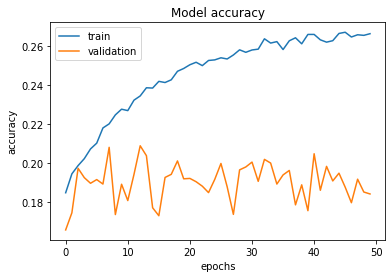

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'])
plt.show()